Combining the csv files

In [18]:
import pandas as pd

romance_df = pd.read_csv("romance_books.csv")
classics_df = pd.read_csv("classic_books.csv")
mystery_df = pd.read_csv("mysterY_books.csv")
science_fiction_df = pd.read_csv("scienceFiction_books.csv")
thriller_df = pd.read_csv("thriller_books.csv")

In [19]:
romance_df["Genre"] = "Romance"
classics_df["Genre"] =  "Classics"
mystery_df["Genre"] =  "Mystery"
science_fiction_df["Genre"] =  "Science Fiction"
thriller_df["Genre"] =  "Thriller"

In [20]:
all_books_df = pd.concat([romance_df, classics_df, mystery_df, science_fiction_df, thriller_df], ignore_index=True)
all_books_df.to_csv("All_Books.csv", index=False)


In [21]:
df= pd.read_csv("All_Books.csv")

df.head(10)


,Title,Price,Availability,Rating,Genre
0,Chase Me (Paris Nights #2),25.27,In stock,Five,Romance
1,Black Dust,34.53,In stock,Five,Romance
2,Her Backup Boyfriend (The Sorensen Family #1),33.97,In stock,One,Romance
3,First and First (Five Boroughs #3),15.97,In stock,Four,Romance
4,Fifty Shades Darker (Fifty Shades #2),21.96,In stock,One,Romance
5,The Wedding Dress,24.12,In stock,One,Romance
6,Suddenly in Love (Lake Haven #1),55.99,In stock,Two,Romance
7,Something More Than This,16.24,Stock out,Four,Romance
8,Doing It Over (Most Likely To #1),35.61,In stock,Three,Romance
9,The Wedding Pact (The O'Malleys #2),32.61,In stock,Three,Romance


In [22]:
df.tail(10)

,Title,Price,Availability,Rating,Genre
103,The Elephant Tree,23.82,In stock,Five,Thriller
104,Behind Closed Doors,52.22,Stock out,Four,Thriller
105,You (You #1),43.61,In stock,Five,Thriller
106,The Guilty (Will Robie #4),13.82,In stock,Two,Thriller
107,The 14th Colony (Cotton Malone #11),39.24,In stock,One,Thriller
108,Give It Back,18.32,In stock,Two,Thriller
109,Killing Floor (Jack Reacher #1),31.49,In stock,Four,Thriller
110,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71,In stock,Three,Thriller
111,Far From True (Promise Falls Trilogy #2),34.93,In stock,Two,Thriller
112,The Travelers,15.77,In stock,One,Thriller


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         113 non-null    object 
 1   Price         113 non-null    float64
 2   Availability  113 non-null    object 
 3   Rating        113 non-null    object 
 4   Genre         113 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.5+ KB
None


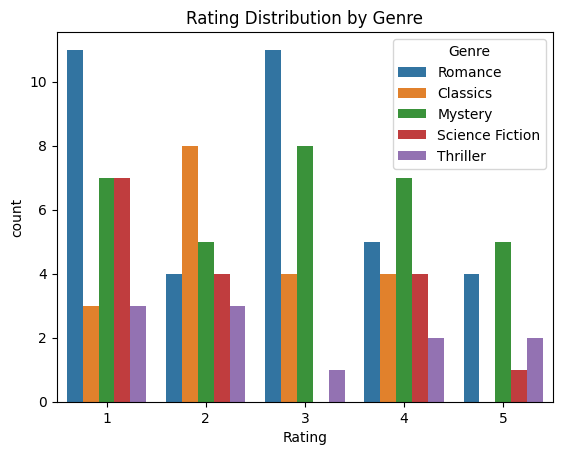

In [24]:
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating_Num"] = df["Rating"].map(rating_map)

sns.countplot(x="Rating_Num", hue="Genre", data=df)
plt.title("Rating Distribution by Genre")
plt.xlabel("Rating")
plt.show()


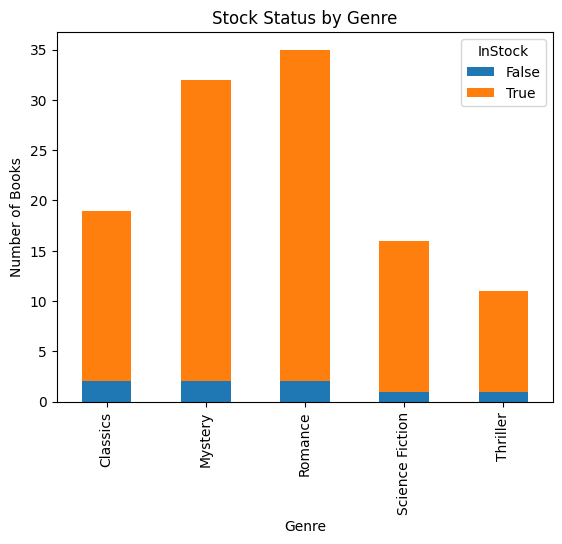

In [25]:
df["InStock"] = df["Availability"].str.contains("In stock")
stock_counts = df.groupby("Genre")["InStock"].value_counts().unstack()
stock_counts.plot(kind="bar", stacked=True)
plt.title("Stock Status by Genre")
plt.ylabel("Number of Books")
plt.show()



In [26]:
print(df[["Price", "Rating_Num"]].corr())


               Price  Rating_Num
Price       1.000000    0.084367
Rating_Num  0.084367    1.000000


In [27]:
#ascending order of price
sorted_by_price = df.sort_values(by="Price")
print(sorted_by_price[["Title", "Genre", "Price"]].head(10))
print(sorted_by_price[["Title","Genre", "Price"]].tail(10))

                                                 Title            Genre  Price
89                                         The Project  Science Fiction  10.65
61                Tastes Like Fear (DI Marnie Rome #3)          Mystery  10.69
94   The Restaurant at the End of the Universe (Hit...  Science Fiction  10.92
23                                Reservations for Two          Romance  11.10
67                          Hide Away (Eve Duncan #20)          Mystery  11.84
21          The Purest Hook (Second Circle Tattoos #3)          Romance  12.25
82                                   The Girl You Lost          Mystery  12.29
102                                        In Her Wake         Thriller  12.84
18            Dark Lover (Black Dagger Brotherhood #1)          Romance  12.87
19                 Changing the Game (Play by Play #2)          Romance  13.38
                                                 Title     Genre  Price
6                     Suddenly in Love (Lake Haven #1)   Ro

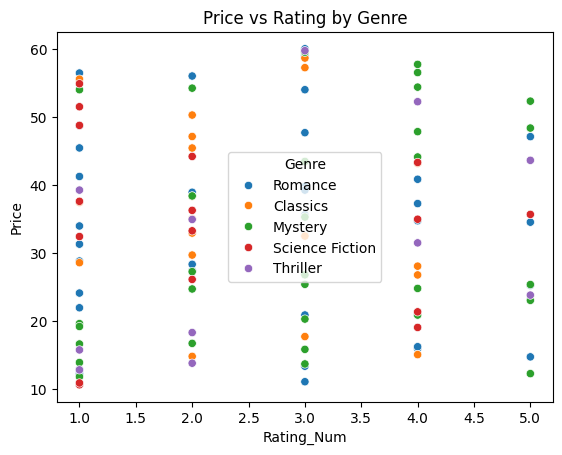

In [28]:
sns.scatterplot(x="Rating_Num", y="Price", hue="Genre", data=df)
plt.title("Price vs Rating by Genre")
plt.show()


In [ ]:
print(df["Availability"].unique())

df["Availability"] = df["Availability"].str.strip().str.lower()

stock_out_books = df[df["Availability"] == "stock out"]
print(stock_out_books)


['in stock' 'stock out']
                                        Title  Price Availability Rating  \
7                    Something More Than This  16.24    stock out   Four   
18   Dark Lover (Black Dagger Brotherhood #1)  12.87    stock out    One   
44                 The Picture of Dorian Gray  29.70    stock out    Two   
51                            Of Mice and Men  47.11    stock out    Two   
67                 Hide Away (Eve Duncan #20)  11.84    stock out    One   
84       Blood Defense (Samantha Brinkman #1)  20.30    stock out  Three   
91          Sleeping Giants (Themis Files #1)  48.74    stock out    One   
104                       Behind Closed Doors  52.22    stock out   Four   

               Genre  Rating_Num  InStock  
7            Romance           4    False  
18           Romance           1    False  
44          Classics           2    False  
51          Classics           2    False  
67           Mystery           1    False  
84           Mystery      